# **1)Analysis Using LSTM Model**

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras import optimizers
from keras.models import load_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline 
import os

**Some function definitions which will generate input and output pair of sequences.**

In [ ]:
def create_sequences(data, length, output):
    nsignals = data.shape[1]
    siglen = data.shape[0]
    sampX=[]
    sampy=[]
    indx = siglen - output - length
    for j in range(nsignals):
        sig = data[:,j]
        for i in range(indx):
            tempX = sig[i:length+i]
            tempy = sig[i+length:length+i+output]
            sampX.append(tempX)
            sampy.append(tempy)
    nsamples = len(sampX)        
    X = np.array(sampX).reshape(nsamples, length, 1)
    y = np.array(sampy).reshape(nsamples, output) 
    return X, y  



**Function for splitting training and testing dataset:**

In [ ]:
def define_test_dataset(X, y, n_patterns, ntestsigs):
    testindex = int(np.floor(ntestsigs*n_patterns))
    X_train = X[:-testindex,:,:]
    y_train = y[:-testindex,:]
    X_test = X[-testindex:,:,:]
    y_test = y[-testindex:,:]
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    return X_train, y_train, X_test, y_test


**Mean absolute scaled error(MASE)**

In [ ]:
def MASE(realData, predictedData):
    """ Regression Error metric = mean absolute scaled error (MASE)"""
    a1 = realData[:,1:]
    a2 = realData[:,:-1]
    maseErr = mean_absolute_error(a1,predictedData[:,1:])/mean_absolute_error(a1,a2)
    return maseErr

# **Now Load datasets**


In [ ]:
ndataset = 5
length = 10
output = 10

**POD mode 2-5**

In [ ]:
############# POD mode 2
fM2 = h5py.File('PODm2_isotropicTurb32BoxALL.mat')
dataM2 = fM2.get('data')
dataM2 = np.transpose(dataM2)
nsignals = dataM2.shape[1]
siglen = dataM2.shape[0]
# Extract sequences
inputdata = dataM2[:,0:ndataset]
XM2, yM2 = create_sequences(inputdata, length, output)
#np.random.shuffle(X)
#np.random.shuffle(y)
ntestpatterns = siglen - length - output
ntestsigs = 1
X_trainM2, y_trainM2, X_testM2, y_testM2 = define_test_dataset(XM2, yM2, ntestpatterns, ntestsigs)
X_trainM2.shape


############# POD mode 3
fM3 = h5py.File('PODm3_isotropicTurb32BoxALL.mat')
dataM3 = fM3.get('data')
dataM3 = np.transpose(dataM3)

# Extract sequences
inputdata = dataM3[:,0:ndataset]
XM3, yM3 = create_sequences(inputdata, length, output)
#np.random.shuffle(X)
#np.random.shuffle(y)
ntestpatterns = siglen - length - output
ntestsigs = 1
X_trainM3, y_trainM3, X_testM3, y_testM3 = define_test_dataset(XM3, yM3, ntestpatterns, ntestsigs)
X_trainM3.shape


############# POD mode 4
fM4 = h5py.File('PODm4_isotropicTurb32BoxALL.mat')
dataM4 = fM4.get('data')
dataM4 = np.transpose(dataM4)

# Extract sequences
inputdata = dataM4[:,0:ndataset]
XM4, yM4 = create_sequences(inputdata, length, output)
#np.random.shuffle(X)
#np.random.shuffle(y)
ntestpatterns = siglen - length - output
ntestsigs = 1
X_trainM4, y_trainM4, X_testM4, y_testM4 = define_test_dataset(XM4, yM4, ntestpatterns, ntestsigs)
X_trainM4.shape



############# POD mode 5
fM5 = h5py.File('PODm5_isotropicTurb32BoxALL.mat')
dataM5 = fM5.get('data')
dataM5 = np.transpose(dataM5)

# Extract sequences
inputdata = dataM5[:,0:ndataset]
XM5, yM5 = create_sequences(inputdata, length, output)
#np.random.shuffle(X)
#np.random.shuffle(y)
ntestpatterns = siglen - length - output
ntestsigs = 1
X_trainM5, y_trainM5, X_testM5, y_testM5 = define_test_dataset(XM5, yM5, ntestpatterns, ntestsigs)
X_trainM5.shape

(20012, 10, 1)

# **Now Load datasets**


In [ ]:
ndataset = 5
length = 10
output = 10

# Load LSTM Models:

In [ ]:
modelM2 = load_model('isoturb32boxROM_PODm2_c1.1.h5')
print('Loaded PODm2 model')

modelM3 = load_model('isoturb32boxROM_PODm3_c1.1.h5')
print('Loaded PODm3 model')

modelM4 = load_model('isoturb32boxROM_PODm4_c1.1.h5')
print('Loaded PODm4 model')
 
modelM5 = load_model('isoturb32boxROM_PODm5_c1.1.h5')
print('Loaded PODm5 model') 

Loaded PODm2 model
Loaded PODm3 model
Loaded PODm4 model
Loaded PODm5 model


# ROM prediction time index for all POD modes
 **EVALUATE: Predict future instance of POD coeffs and compare with truth value on test signal**



**timeIndex : np.random.randint(0, ntestpatterns + 1)**

In [ ]:
timeIndex = 4252
############# POD mode 2
datainputM2 = X_testM2[timeIndex ,:,:]
datainputM2 = datainputM2.reshape(1, length, 1)
realdataM2 = y_testM2[timeIndex ,:]
realdataM2 = np.transpose(realdataM2).reshape(1,output)
predictedM2 = modelM2.predict(datainputM2, verbose=0)

############# POD mode 3
datainputM3 = X_testM3[timeIndex ,:,:]
datainputM3 = datainputM3.reshape(1, length, 1)
realdataM3 = y_testM3[timeIndex ,:]
realdataM3 = np.transpose(realdataM3).reshape(1,output)
predictedM3 = modelM3.predict(datainputM3, verbose=0)

############# POD mode 4
datainputM4 = X_testM4[timeIndex ,:,:]
datainputM4 = datainputM4.reshape(1, length, 1)
realdataM4 = y_testM4[timeIndex ,:]
realdataM4 = np.transpose(realdataM4).reshape(1,output)
predictedM4 = modelM4.predict(datainputM4, verbose=0)

############# POD mode 5
datainputM5 = X_testM5[timeIndex ,:,:]
datainputM5 = datainputM5.reshape(1, length, 1)
realdataM5 = y_testM5[timeIndex ,:]
realdataM5 = np.transpose(realdataM5).reshape(1,output)
predictedM5 = modelM5.predict(datainputM5, verbose=0)

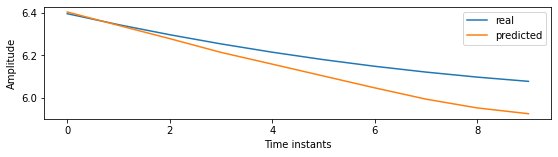

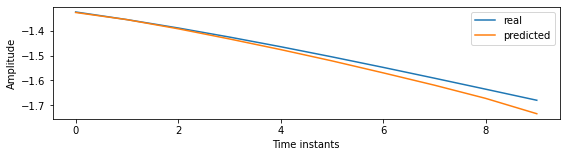

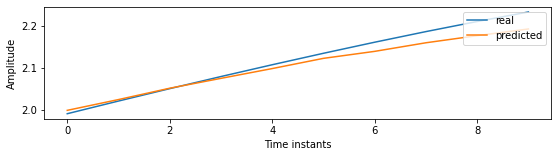

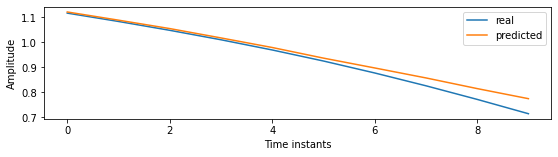

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(321)
plt.plot(np.transpose(realdataM2), label='real')
plt.plot(np.transpose(predictedM2), label='predicted')
plt.legend
plt.xlabel('Time instants')
plt.ylabel('Amplitude')
plt.legend(['real', 'predicted'], loc='upper right')
plt.show()

plt.figure(figsize=(20,7))
plt.subplot(322)
plt.plot(np.transpose(realdataM3), label='real')
plt.plot(np.transpose(predictedM3), label='predicted')
plt.legend
plt.xlabel('Time instants')
plt.ylabel('Amplitude')
plt.legend(['real', 'predicted'], loc='upper right')
plt.show()

plt.figure(figsize=(20,7))
plt.subplot(323)
plt.plot(np.transpose(realdataM4), label='real')
plt.plot(np.transpose(predictedM4), label='predicted')
plt.legend
plt.xlabel('Time instants')
plt.ylabel('Amplitude')
plt.legend(['real', 'predicted'], loc='upper right')
plt.show()

plt.figure(figsize=(20,7))
plt.subplot(324)
plt.plot(np.transpose(realdataM5), label='real')
plt.plot(np.transpose(predictedM5), label='predicted')
plt.xlabel('Time instants')
plt.ylabel('Amplitude')
plt.legend(['real', 'predicted'], loc='upper right')
plt.show()

**Plots for each POD mode 2-5**

**Plot error for all predictions in a model**

In [ ]:
############# POD mode 2
err = None
errTotM2 = []

for idx in range(ntestpatterns):
    datainputM2 = X_testM2[idx ,:,:]
    datainputM2 = datainputM2.reshape(1, length, 1)
    realdataM2 = y_testM2[idx ,:]
    realdataM2 = np.transpose(realdataM2).reshape(1,output)
    predictedM2 = modelM2.predict(datainputM2, verbose=0)
    err = MASE(realdataM2, predictedM2)
    errTotM2.append(err)

############# POD mode 3
err = None
errTotM3 = []

for idx in range(ntestpatterns):
    datainputM3 = X_testM3[idx ,:,:]
    datainputM3 = datainputM3.reshape(1, length, 1)
    realdataM3 = y_testM3[idx ,:]
    realdataM3 = np.transpose(realdataM3).reshape(1,output)
    predictedM3 = modelM3.predict(datainputM3, verbose=0)
    err = MASE(realdataM3, predictedM3)
    errTotM3.append(err)

############# POD mode 4
err = None
errTotM4 = []

for idx in range(ntestpatterns):
    datainputM4 = X_testM4[idx ,:,:]
    datainputM4 = datainputM4.reshape(1, length, 1)
    realdataM4 = y_testM4[idx ,:]
    realdataM4 = np.transpose(realdataM4).reshape(1,output)
    predictedM4 = modelM4.predict(datainputM4, verbose=0)
    err = MASE(realdataM4, predictedM4)
    errTotM4.append(err)    

############# POD mode 5
err = None
errTotM5 = []

for idx in range(ntestpatterns):
    datainputM5 = X_testM5[idx ,:,:]
    datainputM5 = datainputM5.reshape(1, length, 1)
    realdataM5 = y_testM5[idx ,:]
    realdataM5 = np.transpose(realdataM5).reshape(1,output)
    predictedM5 = modelM5.predict(datainputM5, verbose=0)
    err = MASE(realdataM5, predictedM5)
    errTotM5.append(err)    

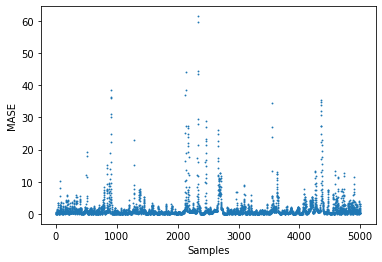

Mean MASE is 1.555749005106054
STD of MASE is 3.631166430435547


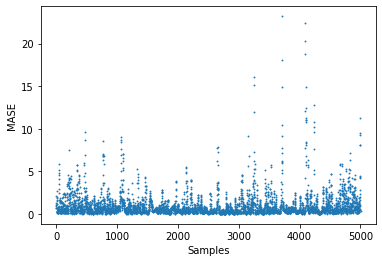

Mean MASE is 0.951171033393351
STD of MASE is 1.4505441117680427


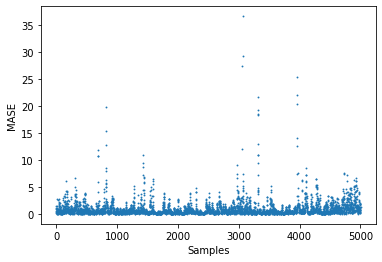

Mean MASE is 0.8950515451862172
STD of MASE is 1.609510227559487


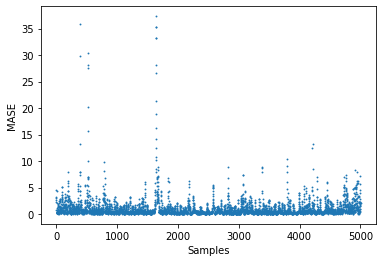

Mean MASE is 0.9867089479444747
STD of MASE is 2.0420904651145286


In [ ]:
xaxis = np.linspace(1,ntestpatterns, ntestpatterns)
plt.scatter(xaxis, errTotM2, s=0.75)
plt.xlabel('Samples')
plt.ylabel('MASE')
plt.show()
print('Mean MASE is', np.mean(errTotM2))
print('STD of MASE is', np.std(errTotM2))

plt.scatter(xaxis, errTotM3, s=0.75)
plt.xlabel('Samples')
plt.ylabel('MASE')
plt.show()
print('Mean MASE is', np.mean(errTotM3))
print('STD of MASE is', np.std(errTotM3))

plt.scatter(xaxis, errTotM4, s=0.75)
plt.xlabel('Samples')
plt.ylabel('MASE')
plt.show()
print('Mean MASE is', np.mean(errTotM4))
print('STD of MASE is', np.std(errTotM4))

plt.scatter(xaxis, errTotM5, s=0.75)
plt.xlabel('Samples')
plt.ylabel('MASE')
plt.show()
print('Mean MASE is', np.mean(errTotM5))
print('STD of MASE is', np.std(errTotM5))

# **Analysis using BiLSTM model**

**Functions definitions:**


**Generate input and output pairs of sequences.**

In [ ]:
def create_sequences_BiLSTM(data, length, output):
    nsignals = data.shape[1]
    siglen = data.shape[0]
    sampX=[]
    sampy=[]
    indx = siglen - output - length
    for j in range(nsignals):
        sig = data[:,j]
        for i in range(indx):
            tempX = sig[i:length+i]
            tempy = sig[i+length:length+i+output]
            sampX.append(tempX)
            sampy.append(tempy)
    nsamples = len(sampX)        
    X = np.array(sampX).reshape(nsamples, length, 1)
    y = np.array(sampy).reshape(nsamples, output, 1) 
    return X, y

**Split training and test datasets.**

In [ ]:
def define_test_dataset_BiLSTM(X, y, n_patterns, ntestsigs):
    testindex = int(np.floor(ntestsigs*n_patterns))
    X_train = X[:-testindex,:,:]
    y_train = y[:-testindex,:,:]
    X_test = X[-testindex:,:,:]
    y_test = y[-testindex:,:,:]
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    return X_train, y_train, X_test, y_test

**Mean absolute scaled error(MASE)**

In [ ]:
def MASE(realData, predictedData):
    """ Regression Error metric = mean absolute scaled error (MASE)"""
    temp = realData.shape
    datlen = temp[1]-1
    a1 = np.reshape(realData[0,1:],[datlen,1])
    a2 = np.reshape(realData[0,:-1],[datlen,1])
    maseErr = mean_absolute_error(a1,predictedData[0,1:])/mean_absolute_error(a1,a2)
    return maseErr

**Load BiLSTM database**

In [ ]:
length=10
output=length
############# POD mode 2

fM2 = h5py.File('PODm2_isotropicTurb32BoxALL.mat')
dataM2 = fM2.get('data')
dataM2 = np.transpose(dataM2)

# Extract sequences
inputdata = dataM2[:,0:ndataset]
XM2, yM2 = create_sequences_BiLSTM(inputdata, length, output)
ntestpatterns = siglen - length - output
ntestsigs = 1
X_trainM2, y_trainM2, X_testM2_B, y_testM2_B = define_test_dataset_BiLSTM(XM2, yM2, ntestpatterns, ntestsigs)

############# POD mode 3

fM3 = h5py.File('PODm3_isotropicTurb32BoxALL.mat')
dataM3 = fM3.get('data')
dataM3 = np.transpose(dataM3)

# Extract sequences
inputdata = dataM3[:,0:ndataset]
XM3, yM3 = create_sequences_BiLSTM(inputdata, length, output)
ntestpatterns = siglen - length - output
ntestsigs = 1
X_trainM3, y_trainM3, X_testM3_B, y_testM3_B = define_test_dataset_BiLSTM(XM3, yM3, ntestpatterns, ntestsigs)

############# POD mode 4

fM4 = h5py.File('PODm4_isotropicTurb32BoxALL.mat')
dataM4 = fM4.get('data')
dataM4 = np.transpose(dataM4)

# Extract sequences
inputdata = dataM4[:,0:ndataset]
XM4, yM4 = create_sequences_BiLSTM(inputdata, length, output)
ntestpatterns = siglen - length - output
ntestsigs = 1
X_trainM4, y_trainM4, X_testM4_B, y_testM4_B = define_test_dataset_BiLSTM(XM4, yM4, ntestpatterns, ntestsigs)

############# POD mode 5

fM5 = h5py.File('PODm5_isotropicTurb32BoxALL.mat')
dataM5 = fM5.get('data')
dataM5 = np.transpose(dataM5)

# Extract sequences
inputdata = dataM5[:,0:ndataset]
XM5, yM5 = create_sequences_BiLSTM(inputdata, length, output)
ntestpatterns = siglen - length - output
ntestsigs = 1
X_trainM5, y_trainM5, X_testM5_B, y_testM5_B = define_test_dataset_BiLSTM(XM5, yM5, ntestpatterns, ntestsigs)


In [ ]:
modelM2_B = load_model('isoturb32boxROM_PODm2_c2.1.h5')
print('Loaded PODm2 model')

modelM3_B = load_model('isoturb32boxROM_PODm3_c2.1.h5')
print('Loaded PODm3 model')

modelM4_B = load_model('isoturb32boxROM_PODm4_c2.1.h5')
print('Loaded PODm4 model')

modelM5_B = load_model('isoturb32boxROM_PODm5_c2.1.h5')
print('Loaded PODm5 model')

Loaded PODm2 model
Loaded PODm3 model
Loaded PODm4 model
Loaded PODm5 model


In [ ]:
nHorizon = 1 # no. of sequences you want to cyclically predict
timeIndex = 764
############# POD mode 2
signalM2_B = np.zeros((1,10))
trueSignalM2_B = np.zeros((1,10))
datainputM2 = X_testM2_B[timeIndex ,:,:]
for i in range(0,nHorizon):
    datainputM2 = datainputM2.reshape(1, length, 1)
    predictedM2 = modelM2_B.predict(datainputM2, verbose=0)
    signalM2_B = np.append(signalM2_B, predictedM2)
    expected = y_testM2_B[timeIndex + i*10,:]
    trueSignalM2_B = np.append(trueSignalM2_B, expected)
    datainputM2 = np.transpose(predictedM2)     

    
############# POD mode 3

signalM3_B = np.zeros((1,10))
trueSignalM3_B = np.zeros((1,10))
datainputM3 = X_testM3_B[timeIndex ,:,:]
for i in range(0,nHorizon):
    datainputM3 = datainputM3.reshape(1, length, 1)
    predictedM3 = modelM3_B.predict(datainputM3, verbose=0)
    signalM3_B = np.append(signalM3_B, predictedM3)
    expected = y_testM3_B[timeIndex + i*10,:]
    trueSignalM3_B = np.append(trueSignalM3_B, expected)
    datainputM3 = np.transpose(predictedM3)    
    
    
############# POD mode 4

signalM4_B = np.zeros((1,10))
trueSignalM4_B = np.zeros((1,10))
datainputM4 = X_testM4_B[timeIndex ,:,:]
for i in range(0,nHorizon):
    datainputM4 = datainputM4.reshape(1, length, 1)
    predictedM4 = modelM4_B.predict(datainputM4, verbose=0)
    signalM4_B = np.append(signalM4_B, predictedM4)
    expected = y_testM4_B[timeIndex + i*10,:]
    trueSignalM4_B = np.append(trueSignalM4_B, expected)
    datainputM4 = np.transpose(predictedM4)     

############# POD mode 5

signalM5_B = np.zeros((1,10))
trueSignalM5_B = np.zeros((1,10))
datainputM5 = X_testM5_B[timeIndex ,:,:]
for i in range(0,nHorizon):
    datainputM5 = datainputM5.reshape(1, length, 1)
    predictedM5 = modelM5_B.predict(datainputM5, verbose=0)
    signalM5_B = np.append(signalM5_B, predictedM5)
    expected = y_testM5_B[timeIndex + i*10,:]
    trueSignalM5_B = np.append(trueSignalM5_B, expected)
    datainputM5 = np.transpose(predictedM5)    
       
print('Done')

Done


**Plot ALL predicted coefficients**

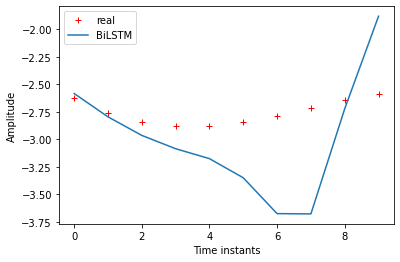

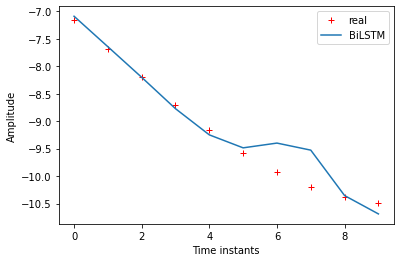

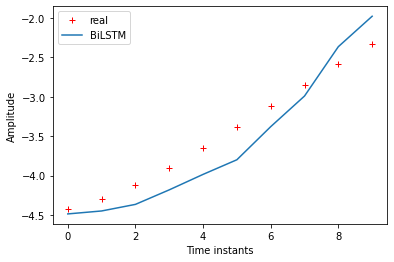

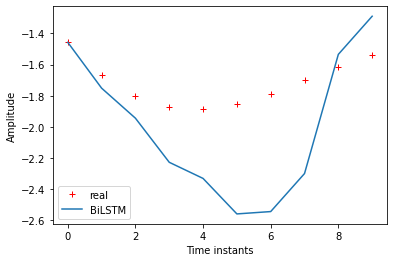

In [ ]:

plt.figure(2)

plt.plot(trueSignalM2_B[10:],'r+', label='real')
plt.plot(signalM2_B[10:], label='BiLSTM')
plt.legend()
plt.xlabel('Time instants')
plt.ylabel('Amplitude')
plt.show()

plt.figure(3)

plt.plot(trueSignalM3_B[10:],'r+', label='real')
plt.plot(signalM3_B[10:], label='BiLSTM')
plt.legend()
plt.xlabel('Time instants')
plt.ylabel('Amplitude')
plt.show()

plt.figure(4)

plt.plot(trueSignalM4_B[10:],'r+', label='real')
plt.plot(signalM4_B[10:], label='BiLSTM')
plt.legend()
plt.xlabel('Time instants')
plt.ylabel('Amplitude')
plt.show()

plt.figure(5)

plt.plot(trueSignalM5_B[10:],'r+', label='real')
plt.plot(signalM5_B[10:], label='BiLSTM')
plt.legend()
plt.xlabel('Time instants')
plt.ylabel('Amplitude')
plt.show()

**Calculate MASE**

In [ ]:
############# POD mode 2
errTotM2 = []

for idx in range(ntestpatterns):
    datainput = X_testM2_B[idx ,:,:]
    datainput = datainput.reshape(1, length, 1)
    realdata = y_testM2_B[idx ,:]
    realdata = np.transpose(realdata).reshape(1,output)
    predicted = modelM2_B.predict(datainput, verbose=0)
    err = MASE(realdata, predicted)
    errTotM2.append(err)

print('Computed PODm2 err Total Error')

############# POD mode 3
errTotM3 = []

for idx in range(ntestpatterns):
    datainput = X_testM3_B[idx ,:,:]
    datainput = datainput.reshape(1, length, 1)
    realdata = y_testM3_B[idx ,:]
    realdata = np.transpose(realdata).reshape(1,output)
    predicted = modelM3_B.predict(datainput, verbose=0)
    err = MASE(realdata, predicted)
    errTotM3.append(err)

print('Computed PODm3 err Total Error')


############# POD mode 4
errTotM4 = []

for idx in range(ntestpatterns):
    datainput = X_testM4_B[idx ,:,:]
    datainput = datainput.reshape(1, length, 1)
    realdata = y_testM4_B[idx ,:]
    realdata = np.transpose(realdata).reshape(1,output)
    predicted = modelM4_B.predict(datainput, verbose=0)
    err = MASE(realdata, predicted)
    errTotM4.append(err)

print('Computed PODm4 err Total Error')

############# POD mode 5
errTotM5 = []

for idx in range(ntestpatterns):
    datainput = X_testM5_B[idx ,:,:]
    datainput = datainput.reshape(1, length, 1)
    realdata = y_testM5_B[idx ,:]
    realdata = np.transpose(realdata).reshape(1,output)
    predicted = modelM5_B.predict(datainput, verbose=0)
    err = MASE(realdata, predicted)
    errTotM5.append(err)

print('Computed PODm5 err Total Error')

Computed PODm2 err Total Error
Computed PODm3 err Total Error
Computed PODm4 err Total Error
Computed PODm5 err Total Error


**Plot MASE for POD mode 2-5**

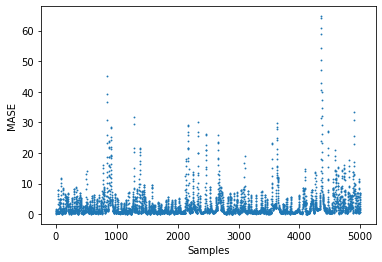

Mean MASE is 2.9090123866239823
STD of MASE is 4.6536693449775575


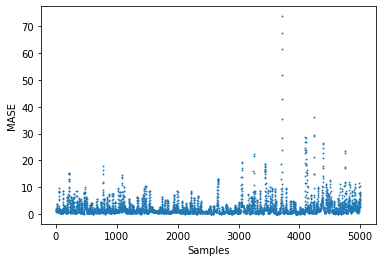

Mean MASE is 2.419644433637602
STD of MASE is 3.5894838727377416


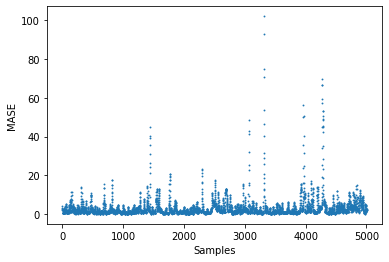

Mean MASE is 2.991487777640738
STD of MASE is 5.3604894461808295


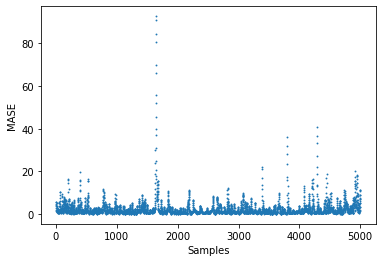

Mean MASE is 2.3883983998196108
STD of MASE is 4.20060756732752


In [ ]:
plt.scatter(xaxis, errTotM2, s=0.75)
plt.xlabel('Samples')
plt.ylabel('MASE')
plt.show()
print('Mean MASE is', np.mean(errTotM2))
print('STD of MASE is', np.std(errTotM2))

plt.scatter(xaxis, errTotM3, s=0.75)
plt.xlabel('Samples')
plt.ylabel('MASE')
plt.show()
print('Mean MASE is', np.mean(errTotM3))
print('STD of MASE is', np.std(errTotM3))

plt.scatter(xaxis, errTotM4, s=0.75)
plt.xlabel('Samples')
plt.ylabel('MASE')
plt.show()
print('Mean MASE is', np.mean(errTotM4))
print('STD of MASE is', np.std(errTotM4))

plt.scatter(xaxis, errTotM5, s=0.75)
plt.xlabel('Samples')
plt.ylabel('MASE')
plt.show()
print('Mean MASE is', np.mean(errTotM5))
print('STD of MASE is', np.std(errTotM5))